## Загрузка данных
#### Данные беру из Human_learning

# Colab

In [1]:
! gdown --id 1P3aYu5kdMLOVxgl2K6wjzx-HtWB5J_wu

"gdown" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [2]:
! unzip / content / uk_used_cars.zip -d / content / uk_used_cars /

"unzip" ­Ґ пў«пҐвбп ў­гваҐ­­Ґ© Ё«Ё ў­Ґи­Ґ©
Є®¬ ­¤®©, ЁбЇ®«­пҐ¬®© Їа®Ја ¬¬®© Ё«Ё Ї ЄҐв­л¬ д ©«®¬.


In [11]:
import pandas as pd

In [ ]:
df = pd.read_csv('/content/uk_used_cars/bmw.csv')

In [5]:
df.head()

NameError: name 'df' is not defined

# Pycharm

In [1]:
from zipfile import ZipFile

with ZipFile('uk_used_cars.zip', 'r') as zf:
    zf.extractall()

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv(r'C:\PyCharm\Python\Data_Science_GM\4.Human_learning\bmw.csv')

In [3]:
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [4]:
df.shape

(10781, 9)

# Обучающая, валидационная и тестовая выборка

In [5]:
from sklearn.model_selection import train_test_split

In [6]:
train, test = train_test_split(df,train_size=0.6,random_state=42)

In [7]:
val, test = train_test_split(test,train_size=0.5,random_state=42)

# Список фичей

In [8]:
X = ['model', 'year', 'transmission', 'mileage', 'fuelType', 'tax',
       'mpg', 'engineSize']

cat_features = ['model', 'transmission', 'fuelType']

y = ['price']

In [9]:
from catboost import CatBoostRegressor

In [10]:
parameters = {'cat_features': cat_features,
              'eval_metric': 'MAPE',
              'learning_rate': 0.08,
              'random_seed':42,
              'verbose':100}

In [11]:
model = CatBoostRegressor(**parameters)

In [12]:
model.fit(train[X],train[y],eval_set=(val[X],val[y]))

0:	learn: 0.4564416	test: 0.4521294	best: 0.4521294 (0)	total: 165ms	remaining: 2m 44s
100:	learn: 0.0875290	test: 0.0867329	best: 0.0867329 (100)	total: 2.19s	remaining: 19.5s
200:	learn: 0.0760834	test: 0.0779235	best: 0.0779235 (200)	total: 4.4s	remaining: 17.5s
300:	learn: 0.0708670	test: 0.0740290	best: 0.0740290 (300)	total: 6.55s	remaining: 15.2s
400:	learn: 0.0676240	test: 0.0718814	best: 0.0718814 (400)	total: 8.42s	remaining: 12.6s
500:	learn: 0.0654070	test: 0.0709221	best: 0.0708594 (496)	total: 10.3s	remaining: 10.2s
600:	learn: 0.0638577	test: 0.0704606	best: 0.0704490 (599)	total: 12.1s	remaining: 8.06s
700:	learn: 0.0622969	test: 0.0698226	best: 0.0698226 (700)	total: 14s	remaining: 5.97s
800:	learn: 0.0609583	test: 0.0694169	best: 0.0694004 (791)	total: 15.8s	remaining: 3.93s
900:	learn: 0.0596089	test: 0.0689968	best: 0.0689945 (895)	total: 17.6s	remaining: 1.94s
999:	learn: 0.0584626	test: 0.0686829	best: 0.0686377 (993)	total: 19.5s	remaining: 0us

bestTest = 0.0686

# Проверка на тестовой выборке

In [13]:
test['price_pred'] = model.predict(test[X])

In [14]:
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error

In [15]:
def error(y_true,y_pred):
  print(mean_absolute_error(y_true,y_pred))
  print(mean_absolute_percentage_error(y_true,y_pred))

In [16]:
error(test['price'],test['price_pred'])

1537.5600657036578
0.0724718966452533


## Анализ ошибок

##### Добавим колонку ошибки, чтобы знать, на сколько модель занижает или завышает стоимость авто

##### Ошибки анализируются на тех данных, которые модель не видела, то есть на тестовых

In [17]:
test['error'] = test.price_pred - test.price

In [18]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658


In [19]:
import matplotlib.pyplot as plt

plt.style.use('dark_background')
plt.style.use('seaborn-v0_8-colorblind')

##### Смотрим на симметричность модели, с помощью гистограммы и среднего.
##### Модель довольно симметричная

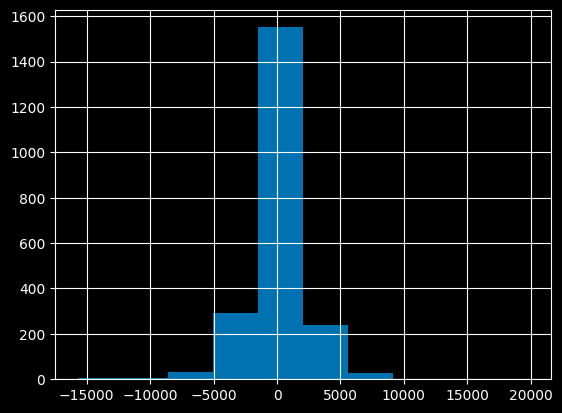

In [20]:
test.error.hist();

In [21]:
test.error.mean()

122.08788795070966

## Абсолютная ошибка

In [22]:
test['error_abs'] = abs(test.error)

In [23]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658


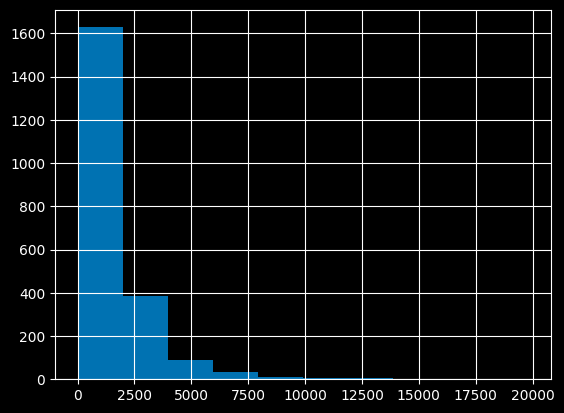

In [24]:
test.error_abs.hist();

In [25]:
test.error_abs.describe()

count     2157.000000
mean      1537.560066
std       1676.859544
min          0.083199
25%        489.152540
50%       1073.305750
75%       1946.619471
max      19820.676673
Name: error_abs, dtype: float64

##### Посмотрим топ 10 машин с самой большой ошибкой

In [26]:
test.sort_values('error_abs', ascending=False).head(10)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673
1244,4 Series,2020,47550,Semi-Auto,101,Diesel,145,60.1,2.0,31822.814760,-15727.185240,15727.185240
6866,4 Series,2020,42520,Semi-Auto,102,Diesel,145,65.7,2.0,28016.370190,-14503.629810,14503.629810
6592,M5,2019,70995,Semi-Auto,23,Petrol,145,24.1,4.4,85092.283023,14097.283023,14097.283023
2315,X2,2019,44980,Semi-Auto,500,Diesel,145,58.9,2.0,32052.149452,-12927.850548,12927.850548
6270,M4,2020,59999,Semi-Auto,3000,Petrol,150,28.5,3.0,47193.043921,-12805.956079,12805.956079
947,2 Series,2015,11998,Semi-Auto,30738,Diesel,20,68.9,2.0,24663.932331,12665.932331,12665.932331
6759,4 Series,2020,42495,Semi-Auto,18,Diesel,150,58.9,2.0,30133.732400,-12361.267600,12361.267600
4833,M4,2019,58662,Automatic,3395,Petrol,145,34.0,3.0,46802.901943,-11859.098057,11859.098057
6215,M4,2018,53999,Semi-Auto,8725,Petrol,145,33.6,3.0,42513.071957,-11485.928043,11485.928043


## Анализ абсолютной ошибки

##### Сгруппируем автомобили по цене для просмотра средней ошибки

In [27]:
test['price_group'] = pd.qcut(test.price, 5)  # qcut разбивает группу на интервалы, практически равные по количеству наблюдений

In [28]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"


##### Чем дешевле автомобиль, тем лучше результаты показывает модель и наоборот, чем дороже авто, тем хуже

In [29]:
test.groupby('price_group')['error_abs'].agg(['count', 'mean'])

,count,mean
price_group,,
"(1199.999, 13995.0]",435,911.712080
"(13995.0, 18500.0]",432,1151.556512
"(18500.0, 23131.6]",427,1318.846517
"(23131.6, 29990.0]",432,1749.723698
"(29990.0, 74990.0]",431,2560.143373


##### Средняя ошибка по всем автомобилям

In [30]:
test.error_abs.mean()

1537.5600657036578

##### Посмотрим направление ошибки
##### В своднике видно, что у дешёвых автомобилей есть тенденция к завышению цены, а у дорогих автомобилей есть тенденция к занижению

In [31]:
t = test.groupby('price_group')[['error_abs', 'error']].agg(['count', 'mean'])

In [32]:
t

error_abs              error            
                        count         mean count        mean
price_group                                                 
(1199.999, 13995.0]       435   911.712080   435  462.229738
(13995.0, 18500.0]        432  1151.556512   432  281.411969
(18500.0, 23131.6]        427  1318.846517   427  254.475675
(23131.6, 29990.0]        432  1749.723698   432  378.241254
(29990.0, 74990.0]        431  2560.143373   431 -768.811293

In [33]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

##### error_mean (error) - направление ошибки.
##### Дешёвым автомобилям модель завышает ошибку, а дорогим занижает

In [34]:
t.head()

,error_abs_count,error_abs_mean,error_count,error_mean
price_group,,,,
"(1199.999, 13995.0]",435,911.712080,435,462.229738
"(13995.0, 18500.0]",432,1151.556512,432,281.411969
"(18500.0, 23131.6]",427,1318.846517,427,254.475675
"(23131.6, 29990.0]",432,1749.723698,432,378.241254
"(29990.0, 74990.0]",431,2560.143373,431,-768.811293


In [35]:
t = t.drop('error_count', axis=1)

In [36]:
t.head()

,error_abs_count,error_abs_mean,error_mean
price_group,,,
"(1199.999, 13995.0]",435,911.712080,462.229738
"(13995.0, 18500.0]",432,1151.556512,281.411969
"(18500.0, 23131.6]",427,1318.846517,254.475675
"(23131.6, 29990.0]",432,1749.723698,378.241254
"(29990.0, 74990.0]",431,2560.143373,-768.811293


##### Разница со средней ошибкой в группе

In [37]:
t['mean_error_diff'] = t.error_abs_mean - test.error_abs.mean()

In [38]:
t.head()

,error_abs_count,error_abs_mean,error_mean,mean_error_diff
price_group,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307


##### Для наглядности добавлю среднюю ошибку в таблицу

In [39]:
t['mean_error'] = test['error_abs'].mean()

In [40]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


##### В таблицу, можно добавить условное форматирование по типу экселя, то есть подкрашивать необходимые ячейки цветом

In [41]:
import seaborn as sns
cm = sns.dark_palette("red", as_cmap=True)

#### В своднике видно: чем больше цена автомобиля, тем больше отклонение от средней ошибки
#### Отрицательное число показывает, что отклонение меньше средней ошибки, что хорошо

In [42]:
t.style.background_gradient(cmap=cm, subset=['mean_error_diff'])  # subset - выбор столбца

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
price_group,,,,,
"(1199.999, 13995.0]",435,911.712080,462.229738,-625.847985,1537.560066
"(13995.0, 18500.0]",432,1151.556512,281.411969,-386.003554,1537.560066
"(18500.0, 23131.6]",427,1318.846517,254.475675,-218.713549,1537.560066
"(23131.6, 29990.0]",432,1749.723698,378.241254,212.163632,1537.560066
"(29990.0, 74990.0]",431,2560.143373,-768.811293,1022.583307,1537.560066


## Анализ абсолютной ошибки относительно остальных переменных

##### Построим сводник по году

In [43]:
t = test.groupby('year')[['error_abs', 'error']].agg(['count', 'mean'])

In [44]:
t.columns = ['_'.join(col).strip() for col in t.columns.values]

In [45]:
t = t.drop('error_count', axis=1)

In [46]:
t['mean_error_diff'] = t.error_abs_mean - test.error_abs.mean()

In [47]:
t['mean_error'] = test['error_abs'].mean()

In [48]:
t

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


##### Если отбросить шумовые года, где мало данных +- до 2011 года и смотреть с 2011 до 2017 года, то видно, что ошибка в данных ниже среднего и модель предсказывает лучше среднего
##### А на новых автомобилях (18-20 год) ошибка становится выше среднего

In [49]:
t.style.background_gradient(cmap=cm, subset=['mean_error_diff'])  # subset - выбор столбца

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


#### Для того, чтобы в дальнейшем не переписывать много одинакового кода, создадим функцию

In [50]:
def print_error(col):
    t = test.groupby(col)[['error_abs', 'error']].agg(['count', 'mean'])
    t.columns = ['_'.join(col).strip() for col in t.columns.values]
    t = t.drop('error_count', axis=1)
    t['mean_error_diff'] = t.error_abs_mean - test.error_abs.mean()
    t['mean_error'] = test['error_abs'].mean()
    display(t.style.background_gradient(cmap=cm, subset=['mean_error_diff']))
    print(t)

##### Проверим работоспособность функции на уже проанализированных данных по году

In [51]:
print_error('year')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
year,,,,,
1996,1,6339.136209,6339.136209,4801.576144,1537.560066
1999,1,890.056901,890.056901,-647.503164,1537.560066
2001,1,927.316449,927.316449,-610.243617,1537.560066
2002,2,2175.440983,-1069.308819,637.880917,1537.560066
2003,1,1482.424637,-1482.424637,-55.135428,1537.560066
2004,4,1902.279284,-305.313519,364.719218,1537.560066
2006,3,1660.249510,775.274447,122.689445,1537.560066
2007,2,1003.062275,1003.062275,-534.497791,1537.560066
2008,4,3182.698112,3182.698112,1645.138047,1537.560066


      error_abs_count  error_abs_mean   error_mean  mean_error_diff  \
year                                                                  
1996                1     6339.136209  6339.136209      4801.576144   
1999                1      890.056901   890.056901      -647.503164   
2001                1      927.316449   927.316449      -610.243617   
2002                2     2175.440983 -1069.308819       637.880917   
2003                1     1482.424637 -1482.424637       -55.135428   
2004                4     1902.279284  -305.313519       364.719218   
2006                3     1660.249510   775.274447       122.689445   
2007                2     1003.062275  1003.062275      -534.497791   
2008                4     3182.698112  3182.698112      1645.138047   
2009                6      703.048594    84.183919      -834.511472   
2010                3     1059.354320   695.204249      -478.205745   
2011               12      605.873341   428.301728      -931.686725   
2012  

In [54]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]"


##### Посмотрим данные по трансмиссии:
##### Данные с ручной коробкой показывают лучший результат

In [55]:
print_error('transmission')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
transmission,,,,,
Automatic,695,1494.208611,36.406949,-43.351455,1537.560066
Manual,504,1079.145745,142.507574,-458.414320,1537.560066
Semi-Auto,958,1810.180189,173.504100,272.620124,1537.560066


              error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
transmission                                                                 
Automatic                 695     1494.208611   36.406949       -43.351455   
Manual                    504     1079.145745  142.507574      -458.414320   
Semi-Auto                 958     1810.180189  173.504100       272.620124   

               mean_error  
transmission               
Automatic     1537.560066  
Manual        1537.560066  
Semi-Auto     1537.560066  


##### Посмотрим на данные по пробегу, но для начала разобьём данные на группы

In [58]:
test['mileage_group'] = pd.qcut(test.mileage, 5)

In [60]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]"


##### Модель больше всего ошибается на новых машинах, у которых меньше всего пробег

In [61]:
print_error('mileage_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mileage_group,,,,,
"(0.999, 4063.2]",432,2433.845556,293.238143,896.285490,1537.560066
"(4063.2, 9825.4]",431,1725.080432,67.411269,187.520367,1537.560066
"(9825.4, 24299.0]",432,1395.285364,65.804632,-142.274702,1537.560066
"(24299.0, 43519.8]",430,1141.553935,13.742028,-396.006130,1537.560066
"(43519.8, 190000.0]",432,990.635754,169.615201,-546.924311,1537.560066


                     error_abs_count  error_abs_mean  error_mean  \
mileage_group                                                      
(0.999, 4063.2]                  432     2433.845556  293.238143   
(4063.2, 9825.4]                 431     1725.080432   67.411269   
(9825.4, 24299.0]                432     1395.285364   65.804632   
(24299.0, 43519.8]               430     1141.553935   13.742028   
(43519.8, 190000.0]              432      990.635754  169.615201   

                     mean_error_diff   mean_error  
mileage_group                                      
(0.999, 4063.2]           896.285490  1537.560066  
(4063.2, 9825.4]          187.520367  1537.560066  
(9825.4, 24299.0]        -142.274702  1537.560066  
(24299.0, 43519.8]       -396.006130  1537.560066  
(43519.8, 190000.0]      -546.924311  1537.560066  


##### Посмотрим данные на типе топлива

In [62]:
print_error('fuelType')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
fuelType,,,,,
Diesel,1394,1437.061117,98.276014,-100.498949,1537.560066
Hybrid,64,1558.853198,-352.158801,21.293132,1537.560066
Other,5,944.136410,-941.902308,-593.423655,1537.560066
Petrol,694,1741.738585,221.317702,204.178520,1537.560066


          error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
fuelType                                                                 
Diesel               1394     1437.061117   98.276014      -100.498949   
Hybrid                 64     1558.853198 -352.158801        21.293132   
Other                   5      944.136410 -941.902308      -593.423655   
Petrol                694     1741.738585  221.317702       204.178520   

           mean_error  
fuelType               
Diesel    1537.560066  
Hybrid    1537.560066  
Other     1537.560066  
Petrol    1537.560066  


##### Посмотрим данные по налогу

In [64]:
test['tax_group'] = pd.qcut(test.tax, 5, duplicates='drop')  # Выкинем дубликаты для избежания ошибки

In [65]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]"


In [66]:
print_error('tax_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
tax_group,,,,,
"(-0.001, 125.0]",512,823.722414,91.176598,-713.837651,1537.560066
"(125.0, 145.0]",1131,1807.424736,117.301327,269.864670,1537.560066
"(145.0, 150.0]",252,1707.575874,118.514950,170.015808,1537.560066
"(150.0, 580.0]",262,1604.063700,206.593848,66.503634,1537.560066


                 error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
tax_group                                                                       
(-0.001, 125.0]              512      823.722414   91.176598      -713.837651   
(125.0, 145.0]              1131     1807.424736  117.301327       269.864670   
(145.0, 150.0]               252     1707.575874  118.514950       170.015808   
(150.0, 580.0]               262     1604.063700  206.593848        66.503634   

                  mean_error  
tax_group                     
(-0.001, 125.0]  1537.560066  
(125.0, 145.0]   1537.560066  
(145.0, 150.0]   1537.560066  
(150.0, 580.0]   1537.560066  


##### Самая большая ошибка получается на самых новых машинах

In [68]:
test.groupby('tax_group')[['price', 'year']].agg(['count', 'mean'])

price                year             
                count          mean count         mean
tax_group                                             
(-0.001, 125.0]   512  13264.859375   512  2015.365234
(125.0, 145.0]   1131  27536.747126  1131  2018.382847
(145.0, 150.0]    252  25288.376984   252  2018.166667
(150.0, 580.0]    262  18207.576336   262  2014.118321

##### Посмотрим на данные по расходу (mpg - сколько миль можно проехать на 1 галоне топлива)

##### Чтобы перевести mpg в л/100км нужно: 235.22 / mpg
##### Чтобы перевести л/100км в mpg нужно: 235.22 /  л/100км
##### Простыми словами, чем меньше mpg, тем выше расход

In [70]:
test['mpg_group'] = pd.qcut(test.mpg, 5)

In [72]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]","(55.4, 64.2]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]","(42.2, 50.4]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]"


In [73]:
print_error('mpg_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
mpg_group,,,,,
"(5.499, 42.2]",444,2159.412978,227.429403,621.852912,1537.560066
"(42.2, 50.4]",487,1664.200649,361.406267,126.640583,1537.560066
"(50.4, 55.4]",380,1517.852124,46.756860,-19.707942,1537.560066
"(55.4, 64.2]",449,1238.191642,-105.163252,-299.368424,1537.560066
"(64.2, 470.8]",397,1044.181685,39.825594,-493.378380,1537.560066


               error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
mpg_group                                                                     
(5.499, 42.2]              444     2159.412978  227.429403       621.852912   
(42.2, 50.4]               487     1664.200649  361.406267       126.640583   
(50.4, 55.4]               380     1517.852124   46.756860       -19.707942   
(55.4, 64.2]               449     1238.191642 -105.163252      -299.368424   
(64.2, 470.8]              397     1044.181685   39.825594      -493.378380   

                mean_error  
mpg_group                   
(5.499, 42.2]  1537.560066  
(42.2, 50.4]   1537.560066  
(50.4, 55.4]   1537.560066  
(55.4, 64.2]   1537.560066  
(64.2, 470.8]  1537.560066  


In [74]:
test.groupby('mpg_group')[['price', 'year']].agg(['count', 'mean'])

price                year             
              count          mean count         mean
mpg_group                                           
(5.499, 42.2]   444  32876.211712   444  2017.743243
(42.2, 50.4]    487  23569.260780   487  2017.451745
(50.4, 55.4]    380  21489.018421   380  2017.194737
(55.4, 64.2]    449  18276.222717   449  2016.443207
(64.2, 470.8]   397  16704.297229   397  2016.727960

In [75]:
test.groupby('year').mpg.agg(['count', 'mean'])

,count,mean
year,,
1996,1,26.400000
1999,1,31.000000
2001,1,27.700000
2002,2,28.950000
2003,1,26.400000
2004,4,27.125000
2006,3,37.566667
2007,2,36.850000
2008,4,41.075000


##### В целом тренд идёт на сокращение расхода топлива, но в более поздних машинах попались экземпляры с высоким расходом
##### График mpg по годам (чем выше, тем меньше расход)

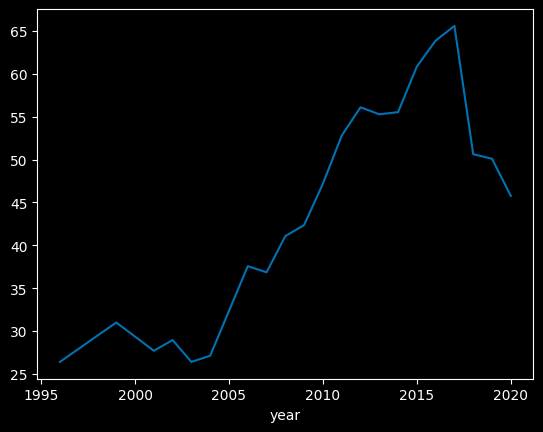

In [77]:
test.groupby('year').mpg.mean().plot();

##### Посмотрим данные по объёму двигателя

In [78]:
test.groupby('year').engineSize.agg(['count', 'mean'])

,count,mean
year,,
1996,1,2.800000
1999,1,2.800000
2001,1,3.000000
2002,2,2.200000
2003,1,3.000000
2004,4,2.775000
2006,3,1.866667
2007,2,2.500000
2008,4,2.625000


##### График объёма двигателя по годам:

In [83]:
test.engineSize.value_counts()

2.0    1323
3.0     495
1.5     278
1.6      24
4.4      15
0.0       7
2.5       4
2.2       3
2.8       2
3.2       2
4.0       2
0.6       1
6.6       1
Name: engineSize, dtype: int64

In [85]:
test['engine_group'] = pd.cut(test.engineSize, [0 ,1.5, 2, float('inf')])

In [86]:
test.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,price_pred,error,error_abs,price_group,mileage_group,tax_group,mpg_group,engine_group
4984,X6,2019,52990,Semi-Auto,3086,Diesel,145,34.9,3.0,56789.268481,3799.268481,3799.268481,"(29990.0, 74990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(2.0, inf]"
4880,X1,2018,24081,Semi-Auto,13245,Diesel,150,60.1,2.0,22236.888207,-1844.111793,1844.111793,"(23131.6, 29990.0]","(9825.4, 24299.0]","(145.0, 150.0]","(55.4, 64.2]","(1.5, 2.0]"
9132,1 Series,2016,12999,Automatic,68949,Petrol,200,43.5,2.0,13529.705791,530.705791,530.705791,"(1199.999, 13995.0]","(43519.8, 190000.0]","(150.0, 580.0]","(42.2, 50.4]","(1.5, 2.0]"
6451,1 Series,2020,11995,Semi-Auto,10,Petrol,150,34.5,2.0,31815.676673,19820.676673,19820.676673,"(1199.999, 13995.0]","(0.999, 4063.2]","(145.0, 150.0]","(5.499, 42.2]","(1.5, 2.0]"
7199,3 Series,2020,29875,Semi-Auto,150,Petrol,145,42.2,2.0,35549.276658,5674.276658,5674.276658,"(23131.6, 29990.0]","(0.999, 4063.2]","(125.0, 145.0]","(5.499, 42.2]","(1.5, 2.0]"


##### Чем больше объём движка, тем модель сильнее ошибается

In [87]:
print_error('engine_group')

,error_abs_count,error_abs_mean,error_mean,mean_error_diff,mean_error
engine_group,,,,,
"(0.0, 1.5]",279,1135.531674,149.248281,-402.028392,1537.560066
"(1.5, 2.0]",1347,1423.236324,60.610112,-114.323742,1537.560066
"(2.0, inf]",524,2049.868683,265.297889,512.308617,1537.560066


              error_abs_count  error_abs_mean  error_mean  mean_error_diff  \
engine_group                                                                 
(0.0, 1.5]                279     1135.531674  149.248281      -402.028392   
(1.5, 2.0]               1347     1423.236324   60.610112      -114.323742   
(2.0, inf]                524     2049.868683  265.297889       512.308617   

               mean_error  
engine_group               
(0.0, 1.5]    1537.560066  
(1.5, 2.0]    1537.560066  
(2.0, inf]    1537.560066  


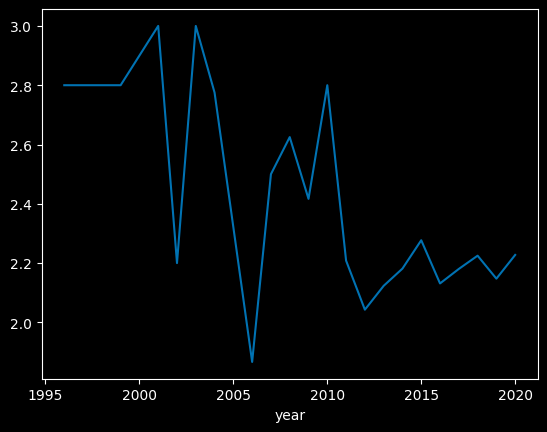

In [89]:
test.groupby('year').engineSize.mean().plot();